<a href="https://colab.research.google.com/github/rahul00245/data/blob/main/Unsupervised_fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler

In [ ]:
#loading dataset
from google.colab import files
uploaded = files.upload()

Saving fish.csv to fish.csv


In [ ]:
df_fish = pd.read_csv('/content/fish.csv', header=None)
df_fish.columns = ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
df_fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [ ]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bream   84 non-null     object 
 1   242.0   84 non-null     float64
 2   23.2    84 non-null     float64
 3   25.4    84 non-null     float64
 4   30.0    84 non-null     float64
 5   38.4    84 non-null     float64
 6   13.4    84 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.7+ KB


In [ ]:
df_fish.describe()

,242.0,23.2,25.4,30.0,38.4,13.4
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,434.017857,27.388095,29.607143,33.157143,27.953571,12.859524
std,382.648669,11.348058,12.249630,13.272086,10.351142,2.129377
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.325000,20.950000,23.550000,16.875000,10.875000
50%,390.000000,28.450000,30.850000,35.050000,26.900000,13.700000
75%,657.500000,32.725000,36.000000,40.675000,39.225000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [ ]:
df_fish.isna().sum()

,0
Bream,0
242.0,0
23.2,0
25.4,0
30.0,0
38.4,0
13.4,0


In [ ]:
df_fish.duplicated().sum()

np.int64(0)

In [ ]:
df_fish.nunique()

,0
Bream,4
242.0,65
23.2,71
25.4,61
30.0,71
38.4,68
13.4,45


#KMeans

In [ ]:
x = df_fish.drop('Species', axis=1)
x

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...
80,950.0,48.3,51.7,55.1,16.2,11.2
81,1250.0,52.0,56.0,59.7,17.9,11.7
82,1600.0,56.0,60.0,64.0,15.0,9.6
83,1550.0,56.0,60.0,64.0,15.0,9.6


In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

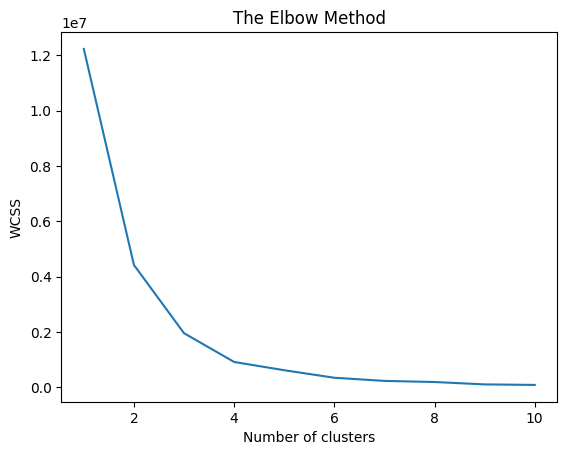

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#from the elbow plot , we can fix values of k as 3
#building the kmeans clustering model
kmeans= KMeans(n_clusters=3, init='k-means++') #max_iter can be set if we need to fix the number of iterations
y_kmeans= kmeans.fit_predict(x) #output generation

In [ ]:
x['Cluster']=y_kmeans
x.head()

,Weight,Length1,Length2,Length3,Height,Width,Cluster
0,242.0,23.2,25.4,30.0,38.4,13.4,0
1,290.0,24.0,26.3,31.2,40.0,13.8,0
2,340.0,23.9,26.5,31.1,39.8,15.1,1
3,363.0,26.3,29.0,33.5,38.0,13.3,1
4,430.0,26.5,29.0,34.0,36.6,15.1,1


In [ ]:
df_fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...
80,Pike,950.0,48.3,51.7,55.1,16.2,11.2
81,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
82,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
83,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


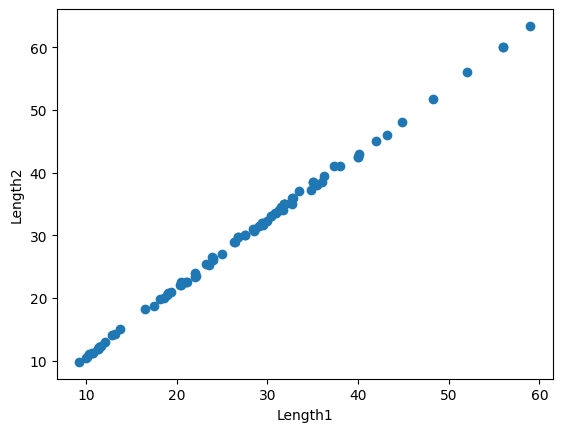

In [ ]:
#before clustering
plt.scatter(x['Length1'],x['Length2'])
plt.xlabel('Length1')
plt.ylabel('Length2')
plt.show()

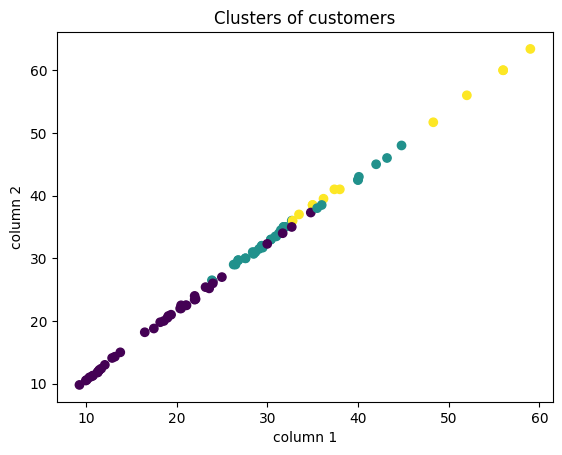

In [ ]:
#after clustering
plt.scatter(x['Length1'],x['Length2'], c= x['Cluster'])
plt.title('Clusters of customers')
plt.xlabel('column 1')
plt.ylabel('column 2')
plt.show()

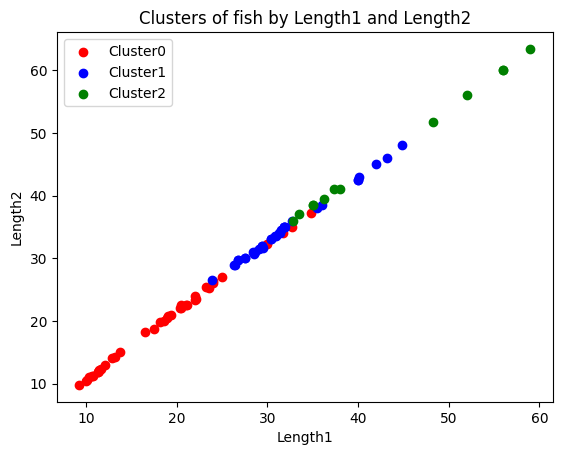

In [ ]:
colors= ['red','blue','green','cyan','magenta']
for i in range(3): # Changed range to 3 since there are 3 clusters
  cluster_data= x[y_kmeans==i]
  plt.scatter(x[x['Cluster']==i]['Length1'], # Changed 1 to 'Length1'
              x[x['Cluster']==i]['Length2'], # Changed 2 to 'Length2'
              c=colors[i],label=f'Cluster{i}')
plt.legend()
plt.title('Clusters of fish by Length1 and Length2') # Added a descriptive title
plt.xlabel('Length1') # Added x-axis label
plt.ylabel('Length2') # Added y-axis label
plt.show()

In [ ]:
#predict the cluster
def predict_cluster(a,b,c,d,e,f):
  new_data= [[a,b,c,d,e,f]]
  cluster=kmeans.predict(new_data)
  return cluster[0]

In [ ]:
predicted_cluster= predict_cluster(50,100,20,30,40,15)
print("the values belong to the cluster",predicted_cluster)

the values belong to the cluster 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


#Agglomerative Heiarchical Clustering

In [ ]:
ag_cluster =linkage(x,method='ward') #ward, singlee, centroid
#linkage matrix i.e; agglomerative cluster model

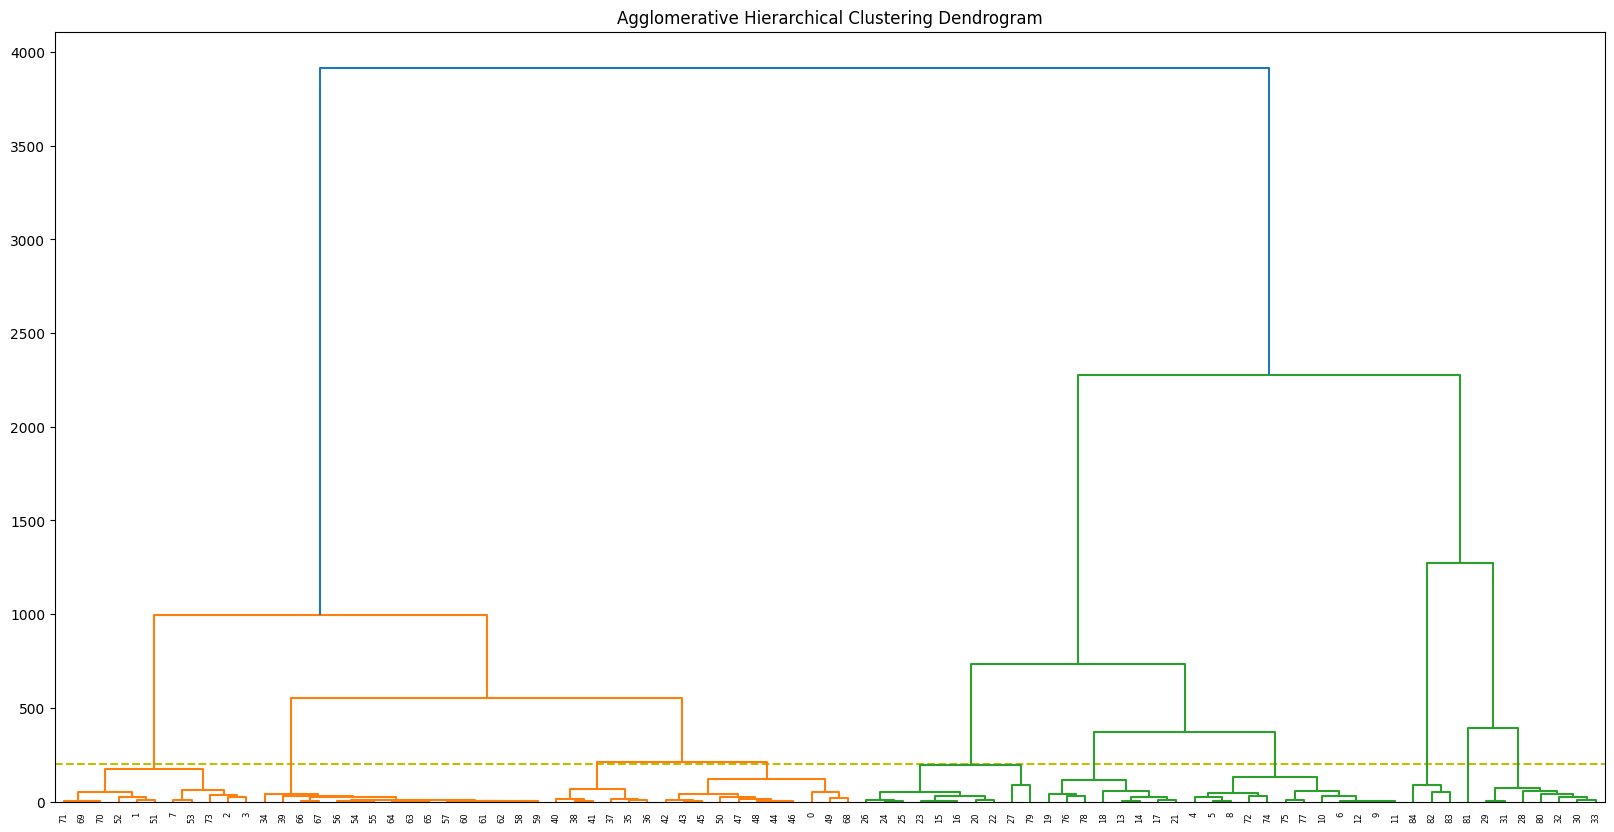

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.axhline(y=200, color='y',linestyle='--')
dendrogram(ag_cluster)
plt.show()

In [ ]:
cluster_labels=fcluster(ag_cluster, t=200, criterion='distance')
x['cluster_agglomerative']= cluster_labels
x.head()

,Weight,Length1,Length2,Length3,Height,Width,Cluster,cluster_agglomerative
0,242.0,23.2,25.4,30.0,38.4,13.4,0,4
1,290.0,24.0,26.3,31.2,40.0,13.8,0,1
2,340.0,23.9,26.5,31.1,39.8,15.1,1,1
3,363.0,26.3,29.0,33.5,38.0,13.3,1,1
4,430.0,26.5,29.0,34.0,36.6,15.1,1,7


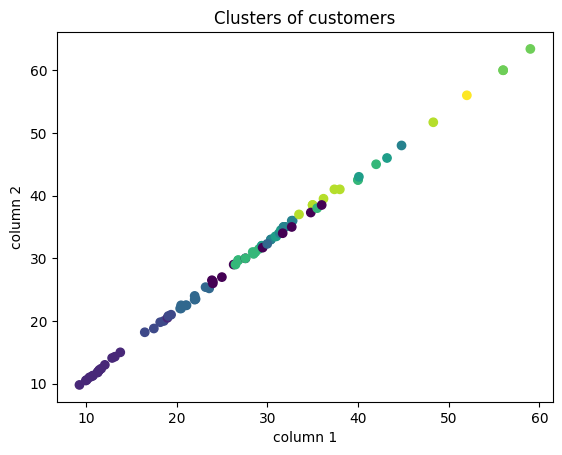

In [ ]:
#after clustering
plt.scatter(x['Length1'],x['Length2'], c= x['cluster_agglomerative'])
plt.title('Clusters of customers')
plt.xlabel('column 1')
plt.ylabel('column 2')
plt.show()

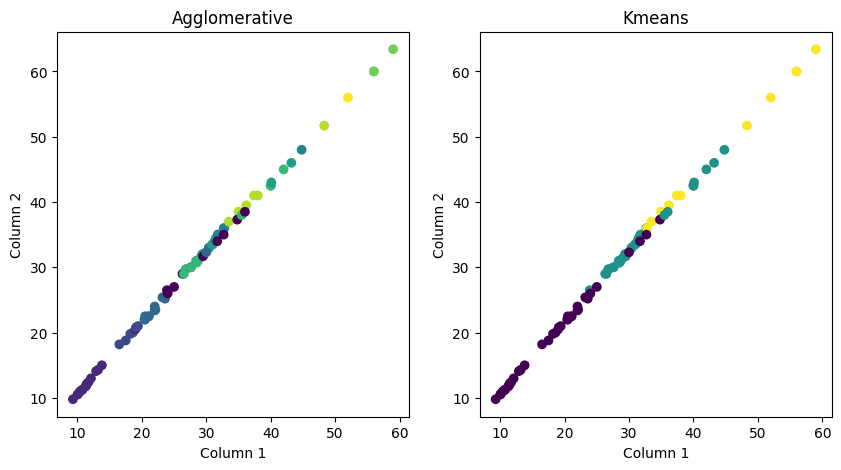

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x['Length1'],x['Length2'], c= x['cluster_agglomerative'])
plt.title('Agglomerative')
plt.xlabel('Column 1')
plt.ylabel('Column 2')

plt.subplot(1,2,2)
plt.scatter(x['Length1'],x['Length2'], c= x['Cluster'])
plt.title('Kmeans')
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.show()